In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

2024-10-22 17:23:29.977059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Data

In [2]:
training_dir = 'tumor_data/Training'
testing_dir = 'tumor_data/Testing'

In [8]:
# Step 1: Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    #shear_range=0.2,         # Random shear
    #zoom_range=0.2,          # Random zoom
    #horizontal_flip=True,     # Random horizontal flip
    validation_split=0.2)     # Use 20% of training data for validation if no separate validation directory

test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load Training and Validation Data
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(128, 128),      # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',    # Since we have 4 classes
    subset='training')           # Use 'training' subset (80% of data)

validation_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')         # Use 'validation' subset (20% of data)

# Step 3: Load Test Data
test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Visualize Data

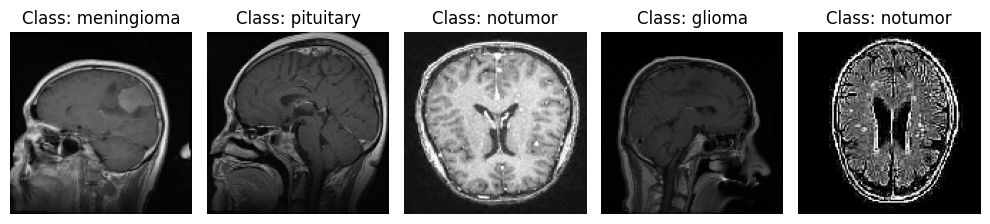

In [9]:
images, labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())
num_images_to_display = 5
plt.figure(figsize=(10, 10))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_labels[np.argmax(labels[i])]}")
    plt.axis('off')  # Hide axes

plt.tight_layout()
plt.show()